# Zmienna losowa ciągła

### Statystyczna analiza danych
**dr inż. Wojciech Artichowicz**

**Katedra Geotechniki i Inżynierii Wodnej PG**

### Rozkład normalny

Na przykładzie rozkładu normalnego zaprezentowana zostanie praca z rozkładem ciągłym biblioteki `scipy.stats`.

Rozkład normalny jest jednym z najważniejszych i najczęściej używanych rozkładów w statystce i probabilistyce. 

Gęstość rozkładu normalnego dana jest wzorem:
$$f(x)=\frac{1}{\sigma \sqrt{2\pi}}exp \left(-\frac{(x-\mu)^2}{2\sigma^2} \right)$$

Parametrami rozkładu normalnego są $\mu$ i $\sigma$, które są interpretowane odpowiednio jako wartość oczekiwana i odchylenie standardowe.

### Import bibliotek języka Python

In [1]:
import numpy as np # tablice, macierze i algebra liniowa
import scipy.stats as st # biblioteka obliczeń statystycznych
import matplotlib.pyplot as plt # podstawowa wizualizacja / wykresy

### Utworzenie obiektu rozkładu normalnego

Zmienną losową ciągłą tworzy się przy wykorzystaniu funkcji tworzącej (tzw. konstruktora) wybranej klasy rozkładu prawdopodobieństwa. W tym przykładzie rozważamy rozkład normalny więc wykorzystana zostanie funkcja [`norm()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm).

Aby utworzyć zmienną losową o rozkładzie normalnym o zadanej wartości oczekiwanej $\mu$ i odchyleniu standardowym $\sigma$ należy użyć następującego wyrażenia: `RV = st.norm(loc=𝜇,scale=𝜎)` wcześniej określając wartości $\mu$ i $\sigma$. Czynność tę wykonano w kolejnej komórce.             

In [2]:
𝜇 = 1 # wartość oczekiwana
𝜎 = 2 # wartość odchylenia standardowego
RV = st.norm(loc=𝜇,scale=𝜎)

Poniżej wygenerowane zostaną wartości odciętych $x$ umożliwiające narysowanie gęstości oraz dystrybuanty rozkładu normalnego. W przypadku rozkładu normalnego prawie całe pole mieści się w zakresie od $\mu-4\cdot \sigma$ do $\mu+4\cdot \sigma$, dlatego wygenerowano wartości $x$ w tym zakresie. Użyto 200 punktów. Następnie korzystając z metod zmiennej losowej `pdf()` oraz `cdf()` obliczono wartości gęstości rozkładu prawdopodobieństwa i dystrybuanty tej zmiennej losowej.

In [3]:
x = np.linspace(𝜇-4*𝜎,𝜇+4*𝜎,200) 
f = RV.pdf(x)
F = RV.cdf(x)

Poniższy kod tworzy wykresy obu funkcji na osobnych wykresach.

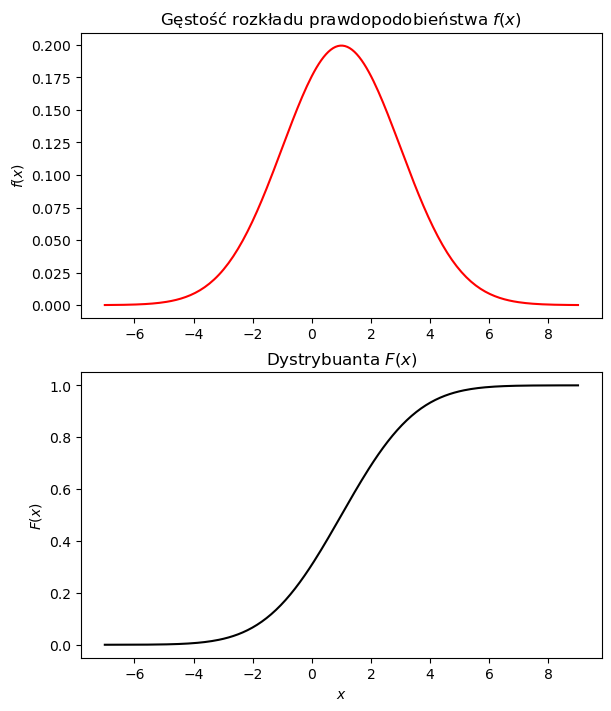

In [4]:
fig, ax = plt.subplots(2,figsize=(6, 7), constrained_layout=True)
ax[0].plot(x, f,color="red")
ax[0].set_ylabel("$f(x)$")
ax[0].set_title("Gęstość rozkładu prawdopodobieństwa $f(x)$")

ax[1].plot(x, F,color="black")
ax[1].set_ylabel("$F(x)$")
ax[1].set_xlabel("$x$")
ax[1].set_title("Dystrybuanta $F(x)$")
pass

### Obliczanie prawdopodobieństwa

Prawdopodobieństwo że zmienna losowa (o wyżej zdefiniowanym rozkładzie) przyjmie wartość z przedziału $[a,b]=[1,3]$

$$P(a<X<b) = F(b)-F(a)$$

In [5]:
a = 1
b = 3
p = RV.cdf(b) - RV.cdf(a)
p

0.3413447460685429

Poniżej zaznaczono obliczone prawdopodobieństwo na wykresach gęstości i dystrybuanty

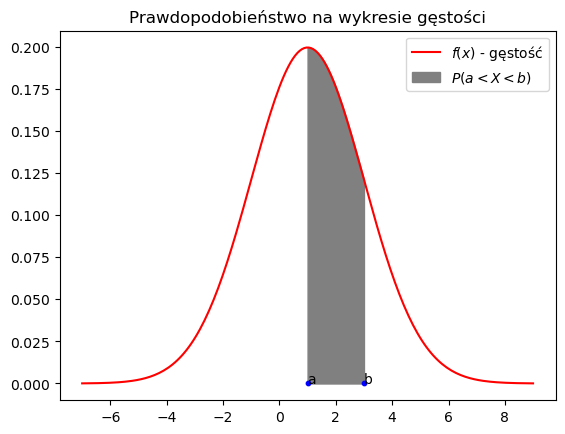

In [6]:
plt.plot(x,f,"red") # wykres gęstości

t = np.linspace(a,b,100) # wartości x do narysowania wypełnienia
plt.fill_between(t,0,RV.pdf(t),color="gray") # wykres wypełnienia

plt.scatter([a,b],[0,0],s=10,c="blue") # wykres punktów a i b
plt.text(a,0.0,"a")
plt.text(b,0.0,"b")

plt.legend(["$f(x)$ - gęstość", "$P(a<X<b)$"])
plt.title("Prawdopodobieństwo na wykresie gęstości")
pass

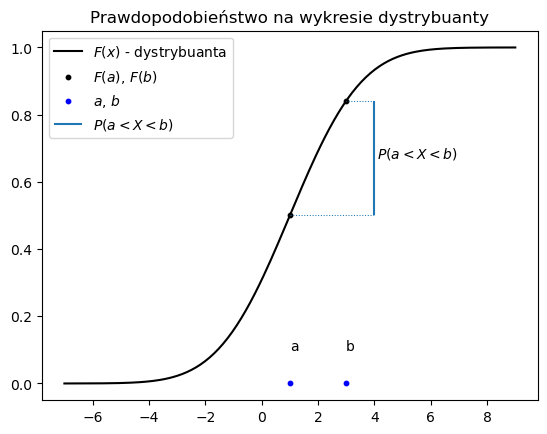

In [7]:
plt.plot(x,F,"black") # wykres dystrybuanty

plt.scatter([a,b],RV.cdf([a,b]),s=10,c="black") # wykres wartości dystrybuanty w a i b

plt.scatter([a,b],[0,0],s=10,c="blue") # wykres punktów a i b
plt.text(a,0.1,"a")
plt.text(b,0.1,"b")

# linia P(a<X<b)
offset = 0.5*(b-a)+b
plt.vlines([offset],RV.cdf(a),RV.cdf(b))
plt.hlines([RV.cdf(a),RV.cdf(b)],[a,offset],[offset,b],linewidth=0.75,linestyle="dotted")
plt.text(offset+0.1,0.5*(RV.cdf(a)+RV.cdf(b)),"$P(a<X<b)$")

plt.legend(["$F(x)$ - dystrybuanta","$F(a)$, $F(b)$","$a$, $b$", "$P(a<X<b)$"])
plt.title("Prawdopodobieństwo na wykresie dystrybuanty")
pass

#### Obliczanie kwantyli rozkładu ciągłego

Do wyznaczenia kwantyla rozkładu służy metoda `ppf()`, która jako argument przyjmuje wartość prawdopodobieństwa $p\in (0,1)$

In [8]:
p = 0.75
q = RV.ppf(p) # obliczenie kwantyla rzędu p rozkładu
q

2.348979500392163

#### Obliczenia parametrów rozkładu

Mając utworzony obiekt rozważanego rozkładu prawdopodobieństwa można użyć metod pozwalających obliczać parametry tego rozkładu:

In [9]:
RV.expect() # wartość oczekiwana

1.0000000000000002

In [10]:
RV.std() # odchylenie standardowe

2.0

In [11]:
RV.median() # mediana

1.0

### Generowanie liczb losowych pochodzących z zadanego rozkładu

W celu wygenerowania wartości losowych (pseudolosowych) pochodzących z rozważanego tu rozkładu należy użyć metody `rvs()`. W celu określenia liczebności wygenerowanej próby pseudolosowej należy określić wartość argumentu `size`. Tu wygenerowanych zostanie 1000 wartości.

In [12]:
X = RV.rvs(size=1000)

Poniżej przedstawiono histogram próby pseudolosowej.

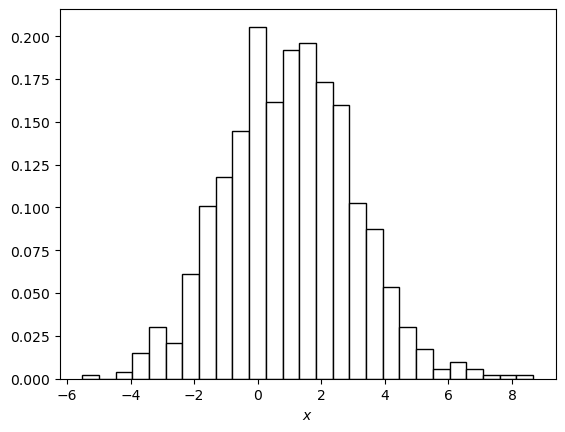

In [13]:
plt.hist(X,bins="auto",density=True,edgecolor="black",color="white")
plt.xlabel("$x$")
pass

Poniższy kod porównuje otrzymany histogram z gęstością utworzonej wcześniej zmiennej losowej.

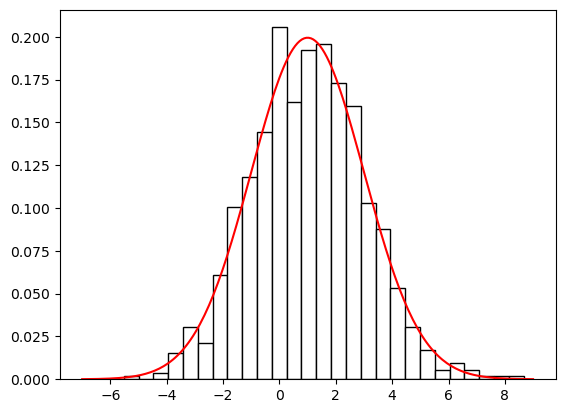

In [14]:
plt.hist(X,bins="auto",density=True,edgecolor="black",color="white")
plt.plot(x,RV.pdf(x),color="red")

### Estymacja parametrów rozkładu na podstawie próby

W praktyce często zachodzi potrzeba określenia parametrów rozkładu na podstawie próby. Tu wykorzystana zostanie próba pseudolosowa, jednak w rzeczywistych przypadkach dane te są wynikami pomiarów. Aby określić wartości parametrów rozkładu na podstawie próby wykorzystuje się metodę `fit()`, która jako argument pobiera wektor danych.

In [15]:
parametry = st.norm.fit(X)
parametry

(1.0092275032196933, 1.9983194159875153)

Aby utworzyć rozkład estymowany należy użyć otrzymanych parametrów. Tu rozkład przyjmuje dwa parametry więc można by użyć następującej składni:

    RVe = st.norm(parametry[0],parametry[1])
    
Jednak znacznie wygodniejszym podejściem jest użycie operatora rozpakowania `*`, który każdy element obiektu iterowalnego przekazuje jako argument do funkcji. Ten sposób wykorzystano poniżej.

In [16]:
RVe = st.norm(*parametry)

Poniższy kod tworzy wykres porównujący histogram oraz rozkład estymowany z rozkładem teoretycznym.

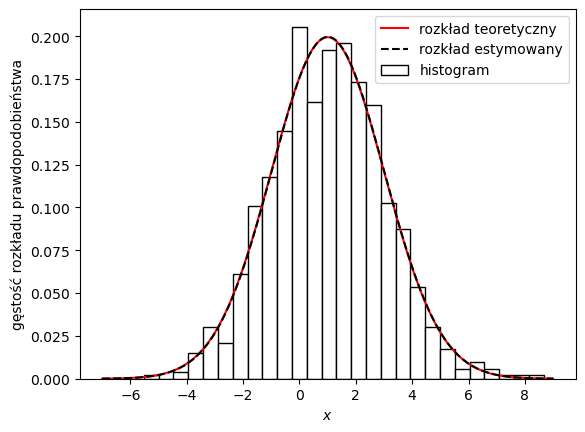

In [17]:
plt.hist(X,bins="auto",density=True,edgecolor="black",color="white")
plt.plot(x,RV.pdf(x),color="red")

p = st.norm.fit(X)
RVe = st.norm(*p)
plt.plot(x,RVe.pdf(x),color="black",linestyle='dashed')
plt.legend(["rozkład teoretyczny","rozkład estymowany","histogram"])
plt.xlabel("$x$")
plt.ylabel("gęstość rozkładu prawdopodobieństwa")
pass